In [1]:
import pandas as pd
from feature_handling import FeatureHandling2 as FH
from splitter_sampler import SplitterSampler as SS
from dataframe_observer import DataframeObserver as DO
from modeling import Modeling
from evaluation import BinClsEvaluation,RegEvaluation, MltClsEvaluation

titanic = pd.read_csv('../data/titanic.csv')
DO.read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               Dtype  Count  unique   unique%  missing  missing%
PassengerId    int64    846     846  1.000000        0  0.000000
Pclass         int64    846       3  0.003546        0  0.000000
Name          object    846     846  1.000000        0  0.000000
Sex           object    846       2  0.002364        0  0.000000
Age          float64    676      86  0.101655      170  0.200946
SibSp          int64    846       7  0.008274        0  0.000000
Parch          int64    846       7  0.008274        0  0.000000
Ticket        object    846     652  0.770686        0  0.000000
Fare         float64    846     243  0.287234        0  0.000000
Cabin         object    192     143  0.169031      654  0.773050
Embarked      object    844       3  0.003546        2  0.002364
Survived       int64    846       2  0.002364        0  0.000000
------------------


In [2]:
titanic = titanic[['Pclass','Sex','Fare','Age','SibSp',
                    'Parch','Embarked','Survived']]
DO.read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    846       3  0.003546        0  0.000000
Sex        object    846       2  0.002364        0  0.000000
Fare      float64    846     243  0.287234        0  0.000000
Age       float64    676      86  0.101655      170  0.200946
SibSp       int64    846       7  0.008274        0  0.000000
Parch       int64    846       7  0.008274        0  0.000000
Embarked   object    844       3  0.003546        2  0.002364
Survived    int64    846       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


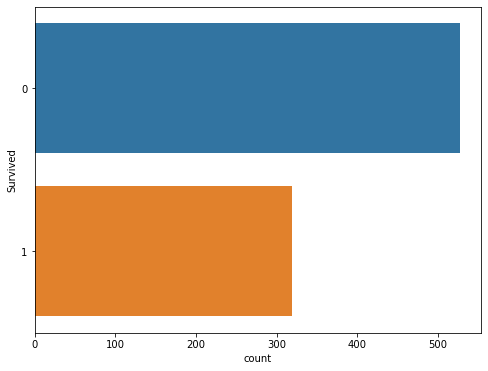

In [3]:
DO.describe_cat_col(titanic,'Survived')

In [4]:
train,test = SS.split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
DO.read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    676       3  0.004438        0  0.000000
Sex        object    676       2  0.002959        0  0.000000
Fare      float64    676     221  0.326923        0  0.000000
Age       float64    537      83  0.122781      139  0.205621
SibSp       int64    676       7  0.010355        0  0.000000
Parch       int64    676       6  0.008876        0  0.000000
Embarked   object    675       3  0.004438        1  0.001479
Survived    int64    676       2  0.002959        0  0.000000
------------------


-------------------------------------------------
['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


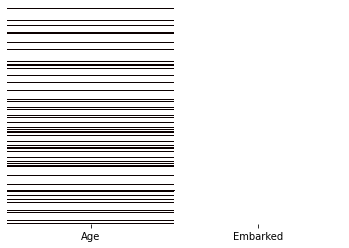

In [6]:
fh = FH(train, test)
DO.missing_pattern(train,only_missing_col=True)

In [7]:
fh.imputer('Age','median')
fh.imputer('Embarked','mode')
train_ed, test_ed, a,b,c=\
    fh.general_encoder(['Age','Fare'],
                       ['Embarked'],
                       ['Pclass','Sex','SibSp','Parch','Survived'],
                       return_encoders=True)

In [8]:
DO.read_df_info(train_ed)
DO.read_df_info(test_ed)

------------------
676 rows, 23 columns.
------------------
              Dtype  Count  unique   unique%  missing  missing%
Age         float64    676      83  0.122781        0       0.0
Fare        float64    676     221  0.326923        0       0.0
Pclass_1    float64    676       2  0.002959        0       0.0
Pclass_2    float64    676       2  0.002959        0       0.0
Pclass_3    float64    676       2  0.002959        0       0.0
Sex_female  float64    676       2  0.002959        0       0.0
Sex_male    float64    676       2  0.002959        0       0.0
SibSp_0     float64    676       2  0.002959        0       0.0
SibSp_1     float64    676       2  0.002959        0       0.0
SibSp_2     float64    676       2  0.002959        0       0.0
SibSp_3     float64    676       2  0.002959        0       0.0
SibSp_4     float64    676       2  0.002959        0       0.0
SibSp_5     float64    676       2  0.002959        0       0.0
SibSp_8     float64    676       2  0.002959

-------------------------------------
Type: float64
Rows: 676
Distinct: 3
Missing: 0
Missing%: 0.0
-------------------------------------
Top 3 values:
   Embarked  Count         %     Cum.%
0       2.0    487  0.720414  0.720414
1       0.0    132  0.195266  0.915680
2       1.0     57  0.084320  1.000000
-------------------------------------


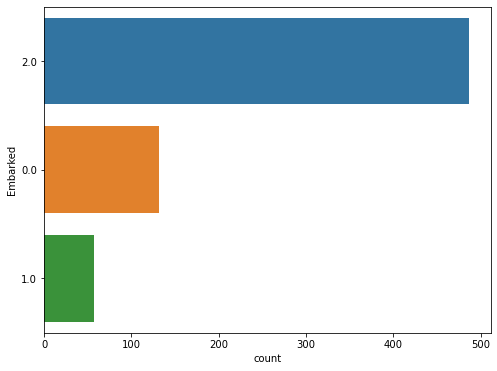

In [9]:
DO.describe_cat_col(train_ed,'Embarked')

In [10]:
X_train, X_test, y_train, y_test= SS.split_train_test(train_ed,test_ed,'Embarked')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 22), (170, 22), (676,), (170,))

In [11]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Survived_0', 'Survived_1']
['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Survived_0', 'Survived_1']


In [13]:
md = Modeling(X_train, X_test, y_train, y_test, task='mlt', metric='accuracy', random_state=1445)
y_score, y_proba, best_model, best_score = \
    md.modeling(model='rf',hp={'n_estimators':[100,200,400],'max_depth':[3,5,7,9]}, class_weight='balanced')

In [14]:
labels =b.categories_[0].tolist()
eva = MltClsEvaluation(y_score,y_test,labels,y_proba)

1 for S, 0 for not S


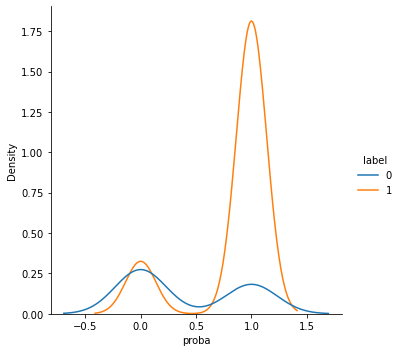

In [15]:
eva.density_chart('S')


In [16]:
eva.detailed_metrics()


Accuracy: 0.7764705882352941
Precision: 0.673046304172392
Recall: 0.6842471264367815
F1_score: 0.6784378894889905
Hamming_Loss: 0.2235294117647059
Log_loss: 0.7629734321544915
Auc_Roc: 0.8375655988403053


Class: S
Model: ROC AUC=0.819


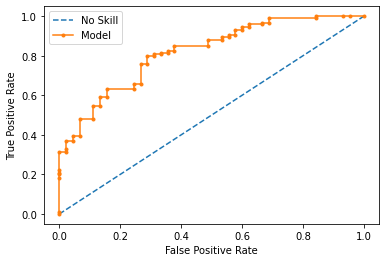

In [17]:
eva.roc_curve('S')

Class: S


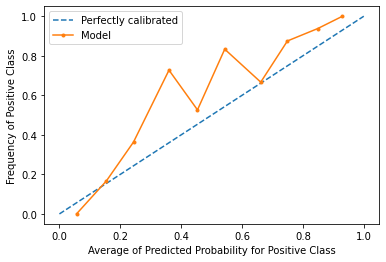

In [18]:
eva.calibration_curve('S')

In [19]:
eva.confusion_matrix()

          Predicted_C  Predicted_Q  Predicted_S
Actual_C           15            0           14
Actual_Q            1           11            4
Actual_S           13            6          106
------------------------------
           Predicted_C  Predicted_Q  Predicted_S
Actual%_C         0.52         0.00         0.48
Actual%_Q         0.06         0.69         0.25
Actual%_S         0.10         0.05         0.85
------------------------------
          Predicted%_C  Predicted%_Q  Predicted%_S
Actual_C          0.52          0.00          0.11
Actual_Q          0.03          0.65          0.03
Actual_S          0.45          0.35          0.85


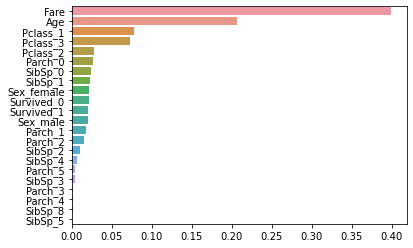

In [20]:
eva.feature_importance(best_model,X_train.columns.tolist())